## Author: Promise Phahlamohlaka
    
### Date Created: 20 April 2018
    
#### Purpose: ML and Text Processing Practices(SMS Spam Classificaction)

# MESSAGE SPAM DETECTION

The purpose of this paper is to explore the results of applying machine learning techniques to Message spam detection. SMS spam (sometimes called cell phone spam) is any junk message delivered to a mobile phone as text messaging through the Short Message Service (SMS). The dataset for this project originates from the UCI Machine Learning Repository. This dataset is tab-separated values (TSV) file. 

## Introduction

Mobile phone spam also known as (unsolicited messages, especially advertising), directed at the text messaging or other communications services of mobile phones or smartphones. Fighting SMS spam is complicated by several factors (compared to Internet email), including the lower rate of SMS spam, which has allowed many users and service providers to ignore the issue, and the limited availability of mobile phone spam-filtering software.

In the paper we would try to analyse different methods to identify spam/ham messages. We will use different approach to establish relations between the text and the category, based on size of message, word count, special keywords, using term-frequency inverse document-frequency (tf-idf) transform.we also use naive bayes classifier to categorize messages as either ham or spam.

## Importance of SPAM detection

There is a need for text classification algorithms that can be used in classifying the messages either ham or spam messages. While ham messages are the one that is created by legitimate users, spam messages are not desirable. Thus spam messages must be detected and removed once they arrived to mobile station, example of spam messages are the ones created by promotional companies.  In addition to the fact that SMS spam are annoying, they 
are also consuming time, resources, money and network bandwidth, nevertheless the availability of spam filtering software for detecting SMS spam are limited. On the other hand,there is another problem that may be generated 
when ham messages are removed and blocked when they are misclassified as spam.





In [1]:
import sklearn

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud 

import seaborn as sns

import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

from sklearn.cross_validation import train_test_split

from nltk.stem import SnowballStemmer

%matplotlib inline


/home/cloudera/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import sklearn
print (sklearn.__version__)

0.19.1


In [4]:
sms = pd.read_csv('Downloads/spam.csv'
                  , encoding = 'latin-1')

In [5]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [6]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
sms = sms.rename(columns ={"v1":'Class',"v2":'Message'})

In [8]:
sms.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [9]:
sms.groupby('Class').describe()

Message
Class                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [10]:
# Count the number of words in each Message

sms['Count']=0
for i in np.arange(0,len(sms.Message)):
    sms.loc[i,'Count'] = len(sms.loc[i,'Message'])

# Unique values in target set
print ("Unique values in the Class set: ", sms.Class.unique())

Unique values in the Class set:  ['ham' 'spam']


In [11]:
# Replace ham with 0 and spam with 1
#df = df.replace(['ham','spam'],[0, 1]) 

# displaying the new table
sms.head()

,Class,Message,Count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
# collecting ham messages in one place 
ham  = sms[sms.Class == 'ham']
ham_count  = pd.DataFrame(pd.Series.value_counts(ham['Count'],sort=True).sort_index())
print ("Number of ham messages in data set:", ham['Class'].count())
print ("Ham Count value", ham_count['Count'].count())

Number of ham messages in data set: 4825
Ham Count value 272


In [13]:
sms['Count'].describe()

if(sms['Count'].empty):
    print('invalid count!')

In [14]:
np.sum(sms['Count'])

446422

In [15]:
#Taking the sum of counts for ham messages
ham_sum_count = sms[sms.Class == 0]
print('The sum of ham counts:',ham_sum_count['Count'].sum())

The sum of ham counts: 0


In [16]:
#Taking the sum of counts for spam messages
ham_sum_count = sms[sms.Class == 1]
print('The sum of ham counts:',ham_sum_count['Count'].sum())

The sum of ham counts: 0


In [17]:
# collecting spam messages in one place 
spam = sms[sms.Class == 'spam']
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print ("Number of spam messages in data set:", spam['Class'].count())
print ("Spam Count value:", spam_count["Count"].count())

Number of spam messages in data set: 747
Spam Count value: 122


# Text Visualizations

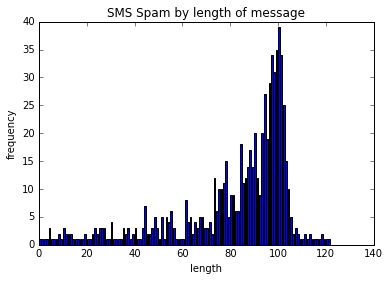

In [18]:
ax = plt.axes()
xline_spam = np.linspace(0, len(spam_count) - 1, len(spam_count))
ax.bar(xline_spam,spam_count['Count'], width=0.75, color='b')
ax.set_title('SMS Spam by length of message')
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

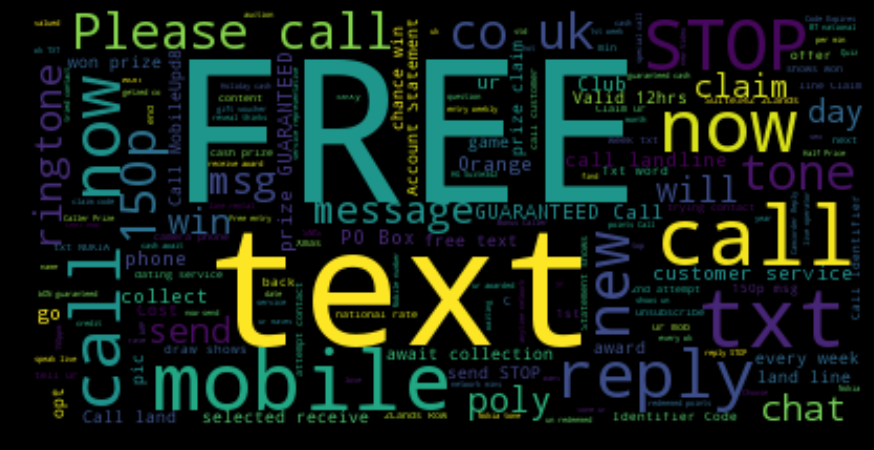

In [19]:


spamText = ""
for text in sms['Message'][sms['Class'] == 'spam']:
    spamText = spamText + text
#print(spamText)

spamcloud = WordCloud().generate(spamText)
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(spamcloud)
plt.axis('off')
plt.show()


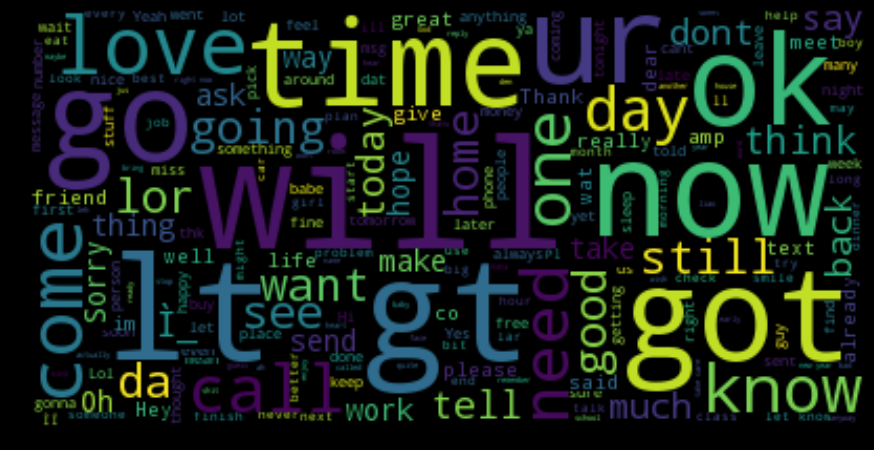

In [20]:
hamText = ""
for text in sms['Message'][sms['Class'] == 'ham']:
    hamText += text
#print(hamText)

hamcloud = WordCloud().generate(hamText)

plt.figure(figsize=(15,10), facecolor='k')

plt.imshow(hamcloud)

plt.axis("off")

plt.show()


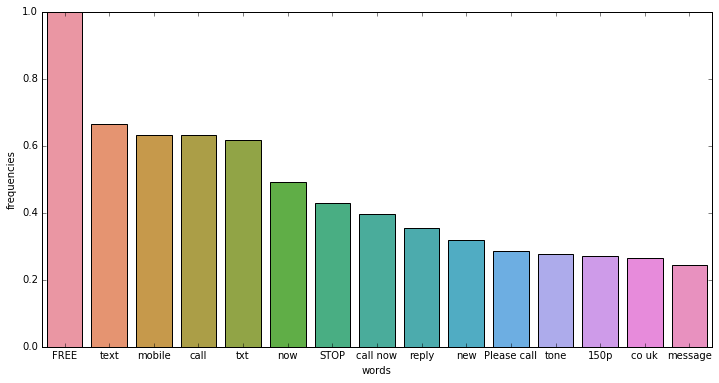

In [21]:
sms_spam = pd.DataFrame()

sms_spam['words'] = spamcloud.words_.keys()

sms_spam['frequencies'] = spamcloud.words_.values()

plt.figure(figsize=(12, 6))

#plt.axis('off')

sns.barplot(x='words', y='frequencies', data=sms_spam.sort_values(by=['frequencies'], ascending=[0]).head(15))

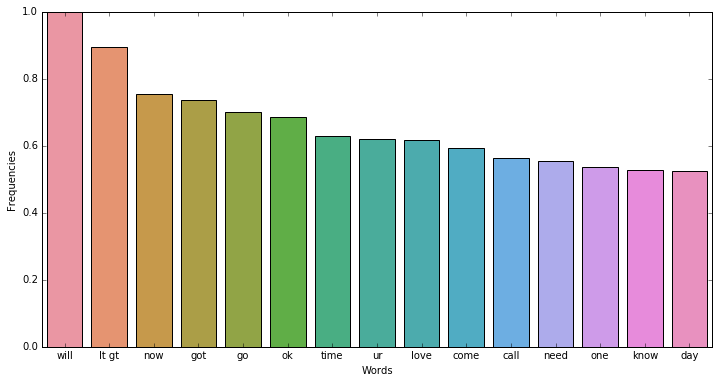

In [22]:
sms_ham = pd.DataFrame()

sms_ham['Words'] = hamcloud.words_.keys()

sms_ham['Frequencies'] = hamcloud.words_.values()

plt.figure(figsize=(12,6))

sns.barplot(x="Words", y="Frequencies", data =sms_ham.sort_values(by=['Frequencies'], ascending=[0]).head(15))

New data from we gonna need later.

# Data Preprocessing

In [23]:
text_feat = sms['Message'].copy()

## Defining text proccesing function.Removing all the punctuations and Stopwords

In [24]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [25]:
vectorizer = TfidfVectorizer("english")

In [26]:
text_feat = text_feat.apply(text_process)

In [27]:
vectorizer = TfidfVectorizer("english")

In [28]:
features = vectorizer.fit_transform(text_feat)

In [29]:
features_train, features_test, labels_train, labels_test = sklearn.model_selection.train_test_split(features, sms['Class'], test_size=0.3, random_state=111)

## importing a bunch of classifiers to fit and pridict

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


## Intitializition and creating dictionaries to iterate through

In [31]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [32]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}



## Defining functions to fit our classifiers and make predictions




In [33]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [34]:
def predict_labels(clf, features):
    return (clf.predict(features))



Now iterate through classifiers and save the results



In [35]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [36]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

,Score
ETC,0.977273
RF,0.970096
KN,0.924641
DT,0.958732
NB,0.984450
AdaBoost,0.967105
SVC,0.978469
LR,0.943182
BgC,0.967105


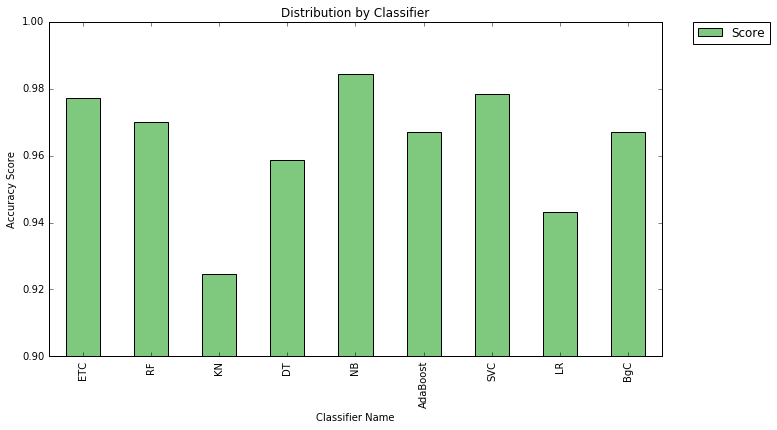

In [37]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.xlabel('Classifier Name')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [38]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words
        

In [39]:
#from nltk.stem.snowball import SnowballStemmer

text_feat = text_feat.apply(stemmer)

In [40]:
features = vectorizer.fit_transform(text_feat)

In [41]:


features_train, features_test, labels_train, labels_test = train_test_split(features, sms['Class'], test_size=0.3, random_state=111)



In [42]:


pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred=predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [43]:
df2 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
df = pd.concat([df,df2],axis=1)
df2.sort('Score2', ascending=False)

/home/cloudera/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Score2
NB,0.985048
SVC,0.978469
ETC,0.977871
RF,0.974880
AdaBoost,0.970096
BgC,0.968900
DT,0.959928
LR,0.946770
KN,0.928230


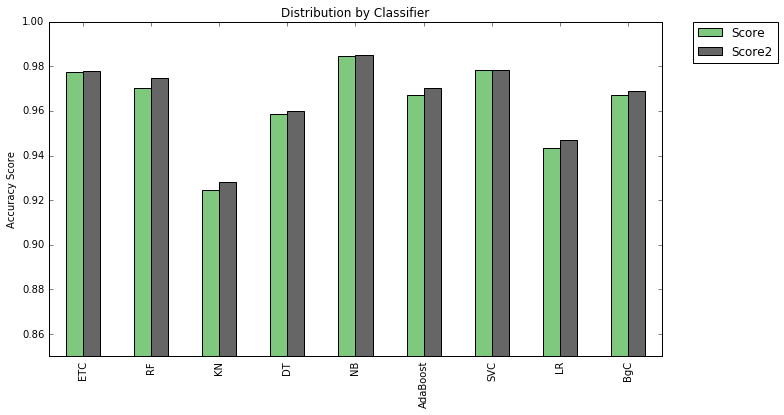

In [44]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [45]:
lf = sms['Count'].as_matrix()
newfeat = np.hstack((features.todense(),lf[:, None]))

In [46]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, sms['Class'], test_size=0.3, random_state=111)

In [47]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))


In [48]:
df3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score3'])
df = pd.concat([df,df3],axis=1)
df3.sort('Score3', ascending=False)

/home/cloudera/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Score3
NB,0.982656
ETC,0.975478
RF,0.975478
BgC,0.962321
AdaBoost,0.961722
DT,0.957536
LR,0.954545
KN,0.880383
SVC,0.861244


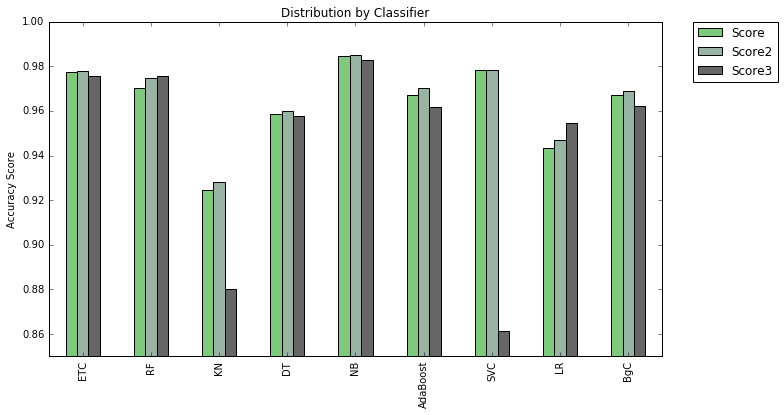

In [49]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [50]:
from sklearn.ensemble import VotingClassifier

In [51]:
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

In [52]:
eclf.fit(features_train,labels_train)

VotingClassifier(estimators=[('BgC', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=9, n_jobs=1, oob_score=False, random_state=111,
         verbose=0, warm_start=False)), ('ETC', ExtraTreesClassifier(bootstrap=False,...hm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=62, random_state=111))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [53]:
pred = eclf.predict(features_test)

In [54]:
print(accuracy_score(labels_test,pred))

0.979066985646


In [55]:
from sklearn.metrics import classification_report

print(classification_report(labels_test,pred))

print('\n\n')

#print(pd.crosstab(labels_test,pred,rownames = ['Actual'],colnames = ['Predicted']))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1440
       spam       0.99      0.86      0.92       232

avg / total       0.98      0.98      0.98      1672






In [56]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

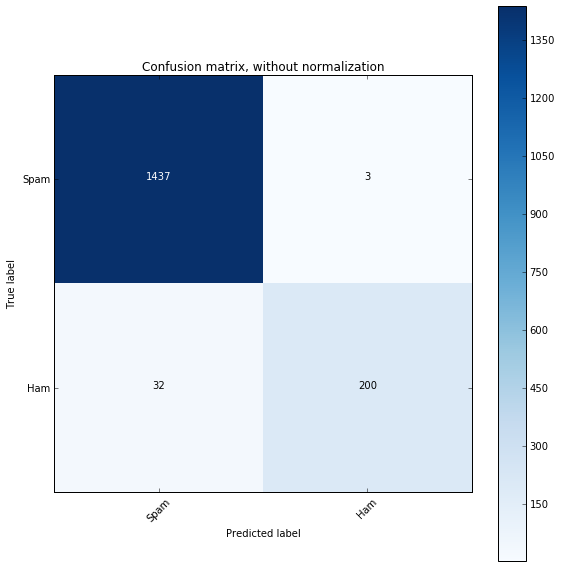

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['Spam', 'Ham'],
                      title='Confusion matrix, without normalization')

#### Conclusion :
    
    What we found was that naive bayes is a good clasifier for text classification and we accurately predicted with a 98 percent 
    accuracy.we also realized the importance of data preprocessing before user can build a model.
    
    This was fun and the next step is to develop an android app to deploy this ML Algorithm for production.